In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
import yaml
from fedai.data.core import *
from fedai.vision.downloader import *

In [ ]:
#| hide
def load_config(file_path):
    with open(file_path, 'r') as file:
        return yaml.safe_load(file)

In [ ]:
#| hide
cfg = load_config('cfg.yaml')

In [ ]:
#| hide
from omegaconf import OmegaConf
cfg = OmegaConf.create(cfg)
cfg.data.name = 'FashionMNIST'

In [ ]:
#| hide
import torchvision.transforms as transforms
class GrayscaleToRGB(object):
    def __call__(self, img):
        if img.mode == 'L':
            img = img.convert("RGB")
        return img
    
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
    GrayscaleToRGB(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])]
    )

In [ ]:
#| hide
from fedai.vision.VisionBlock import *
ds = VisionBlock(cfg, transform=None)

data/FashionMNIST/train data/FashionMNIST/test

Dataset not found, Downloading the dataset: FashionMNIST.



100%|██████████| 26421880/26421880 [00:02<00:00, 11565263.55it/s]


Extracting data/rawdata/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/rawdata/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 839367.01it/s]


Extracting data/rawdata/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/rawdata/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 8994644.28it/s] 


Extracting data/rawdata/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/rawdata/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20583676.83it/s]


Extracting data/rawdata/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/rawdata/FashionMNIST/raw

Number of classes: 10
changed
Client 0	 Size of data: 6183	 Labels:  [0 3 4]
		 Samples of labels:  [(0, 1244), (3, 2162), (4, 2777)]
--------------------------------------------------
Client 1	 Size of data: 49	 Labels:  [2 4 5 7 8]
		 Samples of labels:  [(2, 33), (4, 4), (5, 1), (7, 9), (8, 2)]
--------------------------------------------------
Client 2	 Size of data: 3841	 Labels:  [0 1 2]
		 Samples of labels:  [(0, 166), (1, 2102), (2, 1573)]
--------------------------------------------------
Client 3	 Size of data: 3607	 Labels:  [2 4]
		 Samples of labels:  [(2, 3491), (4, 116)]
--------------------------------------------------
Client 4	 Size of data: 1317	 Labels:  [1 2 3 5 6 8 9]
		 Samples of labels:  [(1, 419), (2, 1), (3, 296), (5, 3), (6, 4), (8, 1), (9, 593)]
--------------------------------------------------
Client 5	 Size of data: 5020	 Labels:  [0]
		 Samples of label

In [ ]:
VisionBlock

fedai.vision.VisionBlock.VisionBlock

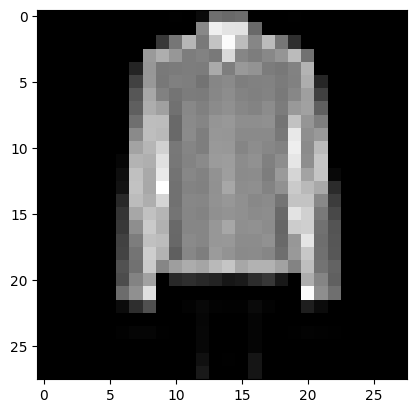

In [ ]:
fs_image = ds[0]['x'][0].reshape(28, 28)

# show the first image
import matplotlib.pyplot as plt
plt.imshow(fs_image, cmap='gray')
plt.show()
